In [1]:
import requests
import json
import datetime
import math
import numpy as np
from datetime import datetime
import time
from geopy.geocoders import GoogleV3

def meters(lat1, lon1, lat2, lon2):  # geo measurement function
    R = 6378.137 # Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2);
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
    d = R * c
    return d * 1000 # meters

def timediff(date1, time1, date2, time2):
    if (date1 == date2):
        FMT = '%H:%M:%S'
        tdelta = datetime.strptime(time2, FMT) - datetime.strptime(time1, FMT)
        return tdelta.seconds/60 # Time diff in minutes
    else:
        return 0
    
data = []
samplepoints = []
toberemovedindex = []

#send_url = 'http://freegeoip.net/json'
#r = requests.get(send_url)
#j = json.loads(r.text)
#lat = j['latitude']
#lon = j['longitude']
#print (lat, lon)

data = np.genfromtxt(open('/home/shashank/Downloads/Geolife Trajectories 1.3/Data/000/Trajectory/20081023025304.plt','r'),skip_header = 6, delimiter=',', dtype=None, encoding='utf8')
#print (data)
print ("------------------------------------------")

#print(meters(10,11,12,13))
#print(meters(data[0][0],data[0][1],data[1][0],data[1][1]))
for i in range(0, 907):
    for j in range(1, 907):
        if (i!= j and meters(data[i][0], data[i][1], data[j][0], data[j][1] <= 50) and timediff(data[i][5], data[i][6], data[j][5], data[j][6])<= 10):
            toberemovedindex.append(j)
            #print("HI")
            
toberemovedindex = list(set(toberemovedindex))

for i in range(0, 907):
    if i not in toberemovedindex:
        samplepoints.append([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],data[i][6]])    

print("The sample points information is here: \n")
print(samplepoints) 

print("The sample points addresses are here: \n")
for i in range(0,len(samplepoints)):
    geolocator = Nominatim()
    location = geolocator.reverse([samplepoints[i][0], samplepoints[i][1]], timeout = 10, exactly_one=True)
    print (location.address)


------------------------------------------
The sample points information is here: 

[[39.984702, 116.318417, 0, 492, 39744.1201851852, '2008-10-23', '02:53:04'], [39.995777, 116.286798, 0, 716, 39744.1723032407, '2008-10-23', '04:08:07'], [40.004775, 116.320158, 0, 105, 39744.4044560185, '2008-10-23', '09:42:25'], [40.008761, 116.323722, 0, 377, 39744.4475810185, '2008-10-23', '10:44:31'], [40.008851, 116.321485, 0, 94, 39744.4641435185, '2008-10-23', '11:08:22']]
The sample points addresses are here: 



NameError: name 'Nominatim' is not defined

In [23]:
geolocator = Nominatim()
print(data[0][1], data[0][0])
#location = geolocator.reverse[data[0][1], data[0][0]]
#print(location.address)
location = geolocator.reverse([data[0][0], data[0][1]], timeout = 10, exactly_one=True)
print (location.longitude,location.latitude,location.address)

116.318417 39.984702
116.3159262 39.9845798 北四环西路, 新科祥园, 海淀路社区, 海淀区, 北京市, 100080, 中国


------------------------------------------


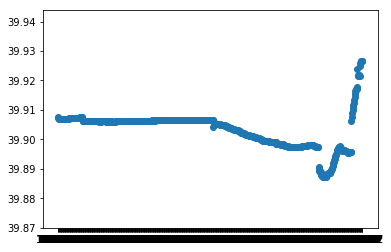

In [29]:
import matplotlib.pyplot as plt
import numpy as np

data = []
x = []
y = []

data = np.genfromtxt(open('/home/shashank/Documents/location/Geolife Trajectories 1.3/Data/000/Trajectory/20081026134407.plt','r'),skip_header = 6, delimiter=',', dtype=None, encoding='utf8')
print ("------------------------------------------")

#print(meters(10,11,12,13))
#print(meters(data[0][0],data[0][1],data[1][0],data[1][1]))
for i in range(0, len(data)):
    x.append(data[i][6])
    y.append(data[i][0])
        #y.append(data[i][1])

fig = plt.figure()
fig.add_subplot(111)
#plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y)
#plt.show()
fig.savefig('graphtest1.png')
